<a href="https://colab.research.google.com/github/jasondupree/jasondupree.github.io/blob/main/Resource_Request.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

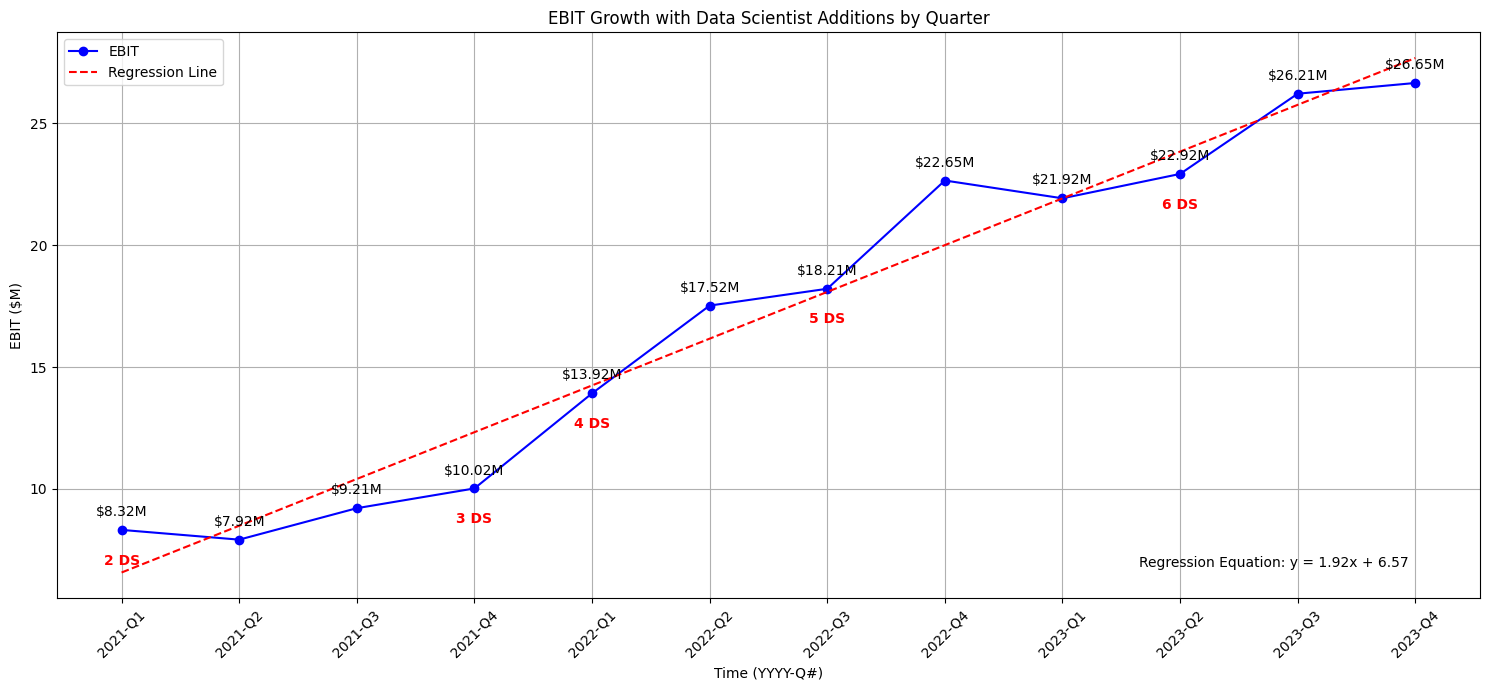

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# Define the time period, extending through 2023
quarters = pd.period_range(start='2021Q1', end='2023Q4', freq='Q')

# Initialize EBIT values with a base for the first data scientist
base_ebit = 8.32
ebit = [base_ebit]

# Initialize data scientists count, starting with 2 in Q1 2021
data_scientists = [2]

# Specific EBIT values for given quarters
specified_ebit_values = {
    '2021Q1': 8.63,
    '2021Q2': 7.92,
    '2021Q3': 9.21,
    '2021Q4': 10.02,
    '2022Q1': 13.92,
    '2022Q2': 17.52,
    '2022Q3': 18.21,
    '2022Q4': 22.65,
    '2023Q1': 21.92,
    '2023Q2': 22.92,
    '2023Q3': 26.21,
    '2023Q4': 26.65,
}

# Add a new data scientist every third quarter, with no additions in the first 2 quarters of 2022
for i in range(1, len(quarters)):
    quarter_str = quarters[i].strftime('%YQ%q')

    if quarter_str in ['2022Q1', '2022Q2']:
        data_scientists.append(4)
    elif quarter_str == '2023Q1':
        data_scientists.append(5)
    elif quarter_str == '2023Q3':
        data_scientists.append(6)
    else:
        # Add a new data scientist every third quarter starting from Q1 2021
        if i % 3 == 0:
            data_scientists.append(data_scientists[-1] + 1)
        else:
            data_scientists.append(data_scientists[-1])

    if quarter_str in specified_ebit_values:
        ebit.append(specified_ebit_values[quarter_str])
    else:
        ebit_growth = np.random.uniform(0.5, 2.5) if i % 3 == 0 else np.random.uniform(0.1, 0.5)
        ebit.append(round(ebit[-1] + ebit_growth, 2))

quarters_str = quarters.strftime('%Y-Q%q')

X = np.arange(len(quarters_str)).reshape(-1, 1)
y = np.array(ebit)
model = LinearRegression().fit(X, y)
regression_line = model.predict(X)

plt.figure(figsize=(15, 7))
plt.plot(quarters_str, ebit, marker='o', color='blue', linestyle='-', label='EBIT')
plt.plot(quarters_str, regression_line, color='red', linestyle='--', label='Regression Line')

last_annotated_ds_count = data_scientists[0]
for i, quarter_str in enumerate(quarters_str):
    if i == 0 or (data_scientists[i] != last_annotated_ds_count):
        # Annotate the DS number under the blue line
        plt.annotate(f'{data_scientists[i]} DS', xy=(quarter_str, ebit[i]), xytext=(0,-25),
                     textcoords="offset points", ha='center', color='red', fontweight='bold')
        last_annotated_ds_count = data_scientists[i]

    # Annotate the EBIT value with two decimal places on top of the blue line
    plt.annotate(f'${ebit[i]:.2f}M', xy=(quarter_str, ebit[i]), xytext=(0,10),
                 textcoords="offset points", ha='center', color='black')

plt.text(0.95, 0.05, f'Regression Equation: y = {model.coef_[0]:.2f}x + {model.intercept_:.2f}',
         fontsize=10, ha='right', va='bottom', transform=plt.gca().transAxes)

plt.xlabel('Time (YYYY-Q#)')
plt.ylabel('EBIT ($M)')
plt.title('EBIT Growth with Data Scientist Additions by Quarter')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.show()
